**Imports:**

In [117]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE 
from collections import Counter
import warnings

# Australia Rain Prediction - Classification

The purpose of this project is to determine if it will be raining tomorrow in Australia.  
Our data was imported from kaggle.com and it contains 145460 rows and 23 columns.  
This data represents a weather samples from 49 different location in Australia.  
The concluding column is whether it will will be raining tomorrow "Yes" or "No".  
Link to the dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package  

### Getting the Data
First we will import the data into the notebook, then we will start working on the data in order to understand the behavior of the data.  
We will try to find some patterns in the data which will allow us to neglect some columns that are irrelevant or that are highly correlated  
with other columns to prevent overfitting. 

In [118]:
# warnings.filterwarnings('ignore')
weather = pd.read_csv('weatherAUS.csv')
weather.head(7)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No


## Explaning the columns
  * **Date:** The date when this row was taken. Year-Month-Day  
  * **Location:** City/Town of the measurement.
  * **MinTemp/MaxTemp:** The Minimum/Maximum temperature in Celsius measured in that day.
  * **Rainfall:** The amount of rainfall recorded for the day in mm
  * **Evaporation:** The amount of mm that where evaporated in the last 24-hrs (liquids transofrming into gas).
  * **Sunshine:** Bright sunshine hours in the 24 hours to midnight.
  * **WindGustDir:** Direction of strongest gust in the 24 hours to midnight (the unit is 16 compass points).
  * **WindGustSpeed:** Speed of strongest wind gust in the 24 hours to midnight in KPH (kilometres per hour).
  * **WindDir9am/WindDir3pm:** Wind direction averaged over 10 minutes prior to 9-AM/3-PM.
  * **WindSpeed9am/WindSpeed3pm:** Wind speed averaged over 10 minutes prior to 9-AM/3-PM.
  * **Humidity9am/Humidity3pm:** Relative humidity at 9-AM/3-PM.
  * **Pressure9am/Pressure3pm:** Atmospheric pressure reduced to mean sea level at 9-AM/3-PM.
  * **Cloud9am/Cloud3pm:** Fraction of sky obscured by cloud at 9-AM/3-PM (number between 0-8, 0 indicates clear sky 8 indicates cloudy sky).
  * **Temp9am/Temp3pm:** Temperature in Celsius at 9-AM/3-PM.
  * **RainToday:** Yes if it was rainning today No otherwise.
  * **RainTomorrow:** Yes/No if it will be rainning tomorrow - ***this is the target column***.  
  
  
  

## Data Exploring:
Before cleaning the data we need to know and udnerstand the data better.
Then we will start working on the data by the following steps:


In [119]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

We can see that the data is divided between two data types: Object and Float64.  
Which in our case implies that we have Strings and Numbers *(because we know we loaded the data from a CSV file then Object can be only String)*.

**We will check how many unique and nulls values the Object type columns contains:**

In [120]:
object_cols = [var for var in weather.columns if weather[var].dtype=='O']
object_nulls = weather[object_cols].isnull().sum()

for var in object_cols:
    print('{} contains:\n  {} unique values.\n  {} null values.\n'.format(var, len(weather[var].unique()), object_nulls[var]))

Date contains:
  3436 unique values.
  0 null values.

Location contains:
  49 unique values.
  0 null values.

WindGustDir contains:
  17 unique values.
  10326 null values.

WindDir9am contains:
  17 unique values.
  10566 null values.

WindDir3pm contains:
  17 unique values.
  4228 null values.

RainToday contains:
  3 unique values.
  3261 null values.

RainTomorrow contains:
  3 unique values.
  3267 null values.



**Lets count all the NaN values:**

In [121]:
missing_vals = pd.DataFrame(weather.isnull().sum(), columns = ['Amount of missing values:'])
missing_vals['Percentage of missing values:']= (missing_vals / len(weather)).round(4) * 100
missing_vals

,Amount of missing values:,Percentage of missing values:
Date,0,0.00
Location,0,0.00
MinTemp,1485,1.02
MaxTemp,1261,0.87
Rainfall,3261,2.24
Evaporation,62790,43.17
Sunshine,69835,48.01
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
WindDir9am,10566,7.26


Later in the project we will handle all the missing values, but now we will delete all the rows with NaN  
values in a category with less then 5% missing data according to what we saw in the table above.

In [122]:
rows_to_delete = ['MinTemp'
, 'MaxTemp'
, 'Rainfall'
, 'WindDir3pm'
, 'WindSpeed9am'
, 'WindSpeed3pm'
, 'Humidity9am'
, 'Humidity3pm'
, 'Temp9am'
, 'Temp3pm'
, 'RainToday'
, 'RainTomorrow']
weather = weather.dropna(subset = rows_to_delete)

The **Date** column datatype is Object so we will transform it to date type for easier handling.

In [123]:
weather['Date'] = pd.to_datetime(weather['Date'])

The **Date** column type is not numeric and we want to convert it to a numeric value.  
We will create 3 more columns:
* day - number between 1-31
* month - numebr between 1-12
* year - number of the year

But there is a major problem with that transformation.   
The problem is that our model will gain wrong conclusions regarding to the value of day/month/year.  
We already know that the weather is affected by the date, i.e chance for rain.  
Our model will think that the value 31 is greater then 1, but actually they are just days so our model can go wrong.  
Which is why we will convert the **Date** to **day and month** columns with numeric values, but the values will be cyclic just like the cycle of the month or year.  
This transformation is made with some math calculations and with the help of two famous functions **Sine** and **Cosine**.

credit to: https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

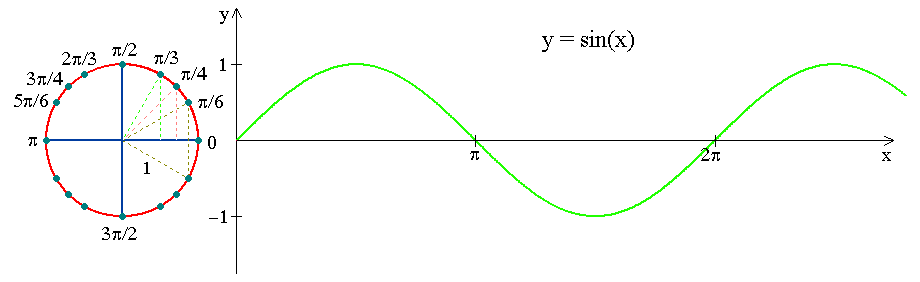

In [124]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

weather['month'] = weather['Date'].dt.month
weather = encode(weather, 'month', 12)

weather['day'] = weather['Date'].dt.day
weather = encode(weather, 'day', 31)

Text(0.5, 1.0, 'Cyclic encoding of Month')

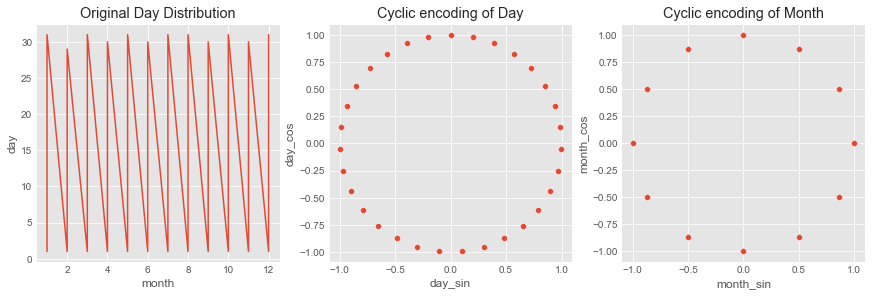

In [125]:
# Let's look at the transformed features

plt.style.use('ggplot')
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (12, 4), constrained_layout = True)

ax1 = sns.lineplot(x = 'month', y = 'day', data = weather, estimator = None, ax=ax1)
ax2 = sns.scatterplot(x = 'day_sin', y = 'day_cos', data = weather, ax = ax2)
ax3 = sns.scatterplot(x = 'month_sin', y = 'month_cos', data = weather, ax = ax3)

ax1.set_title('Original Day Distribution')
ax2.set_title('Cyclic encoding of Day')
ax3.set_title('Cyclic encoding of Month')

The left plot above **Original Day Distribution** represents the original distribution of day and month.  
The middle plot above **Cyclic encoding of Day** represents the cycle of the days with *sin* and *cosine* as x, y.    
The right plot above **Cyclic encoding of Month** represents the cycle of the month with *sin* and *cosine* as x, y.  

Next, we will try to play with the **Location** column, because location is not independent with weather.  
Let's start by trying to gain some knowledge about the location.

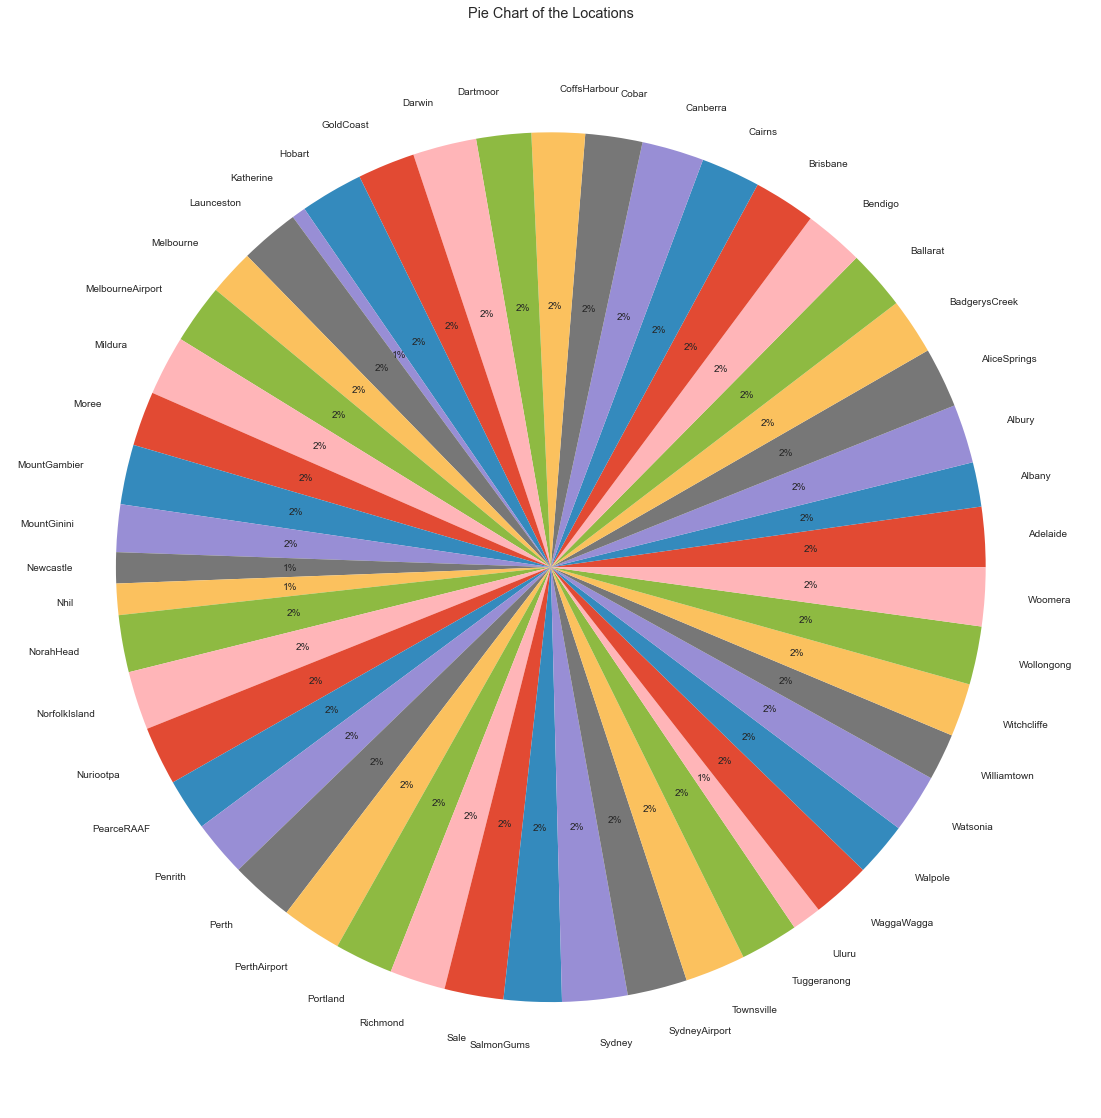

In [126]:
locations = weather.groupby('Location').size()
locations.plot(kind='pie', figsize=(20, 20), autopct='%1.0f%%', title='Pie Chart of the Locations')
plt.ylabel("")
plt.show()

As we can see, preety much most of the towns/cities have the same amount of values in the data, about 2%.   
Australia has 7 states:   
* Northern Territory - **NT**
* Western Australia - **WA**
* Queensland - **QLD**
* New South Wales - **NSW**
* Victoria - **VIC**
* South Australia - **SA**
* Tasmania - **TAS**

So we'll divide the 49 locations into the 7 states, and we'll create a binary column for each state.   
*Note: Australia capital Canberra has it's own state but due to it's location we will count it as NSW*

**Picture of Austrlia states Map**
<div>
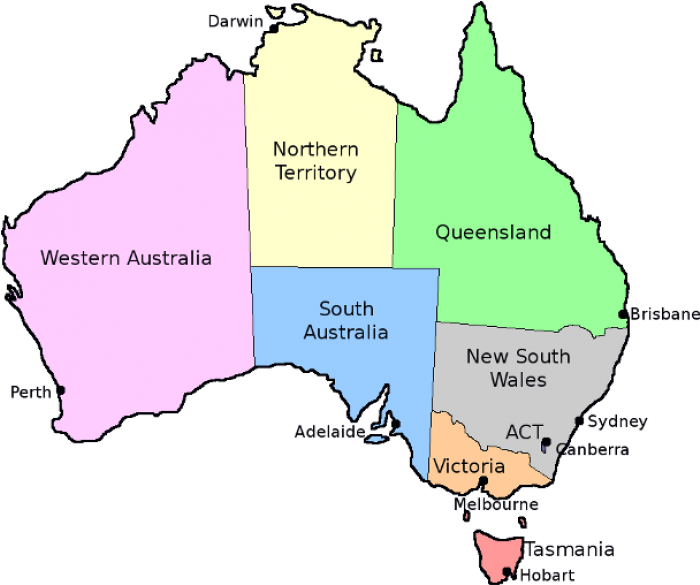
</div>

First, we will create a dictionary that holds state to each town/city.

In [127]:
states_dict = {"Canberra" : "NSW", 
"Sydney" : "NSW", 
"Brisbane": "QLD", 
"Perth" : "WA", 
"Darwin" : "NT", 
"Hobart" : "TAS", 
"Adelaide" : "SA", 
"Melbourne" : "VIC", 
"MountGambier" : "SA", 
"Albury" : "VIC", 
"GoldCoast" : "QLD", 
"Ballarat" : "VIC", 
"Bendigo" : "VIC", 
"Wollongong" : "NSW", 
"Launceston" : "TAS", 
"AliceSprings" : "NT", 
"MountGinini" : "NSW", 
"Cairns" : "QLD", 
"Townsville" : "QLD", 
"Albany" : "WA", 
"Newcastle" : "NSW", 
"Tuggeranong" : "NSW", 
"Penrith" : "NSW", 
"Cobar" : "NSW", 
"PerthAirport" : "WA", 
"Mildura" : "VIC", 
"CoffsHarbour" : "NSW", 
"Watsonia" : "VIC", 
"Moree" : "NSW", 
"Portland" : "VIC", 
"NorfolkIsland" : "DELETE", 
"Witchcliffe" : "WA", 
"Williamtown" : "NSW", 
"Sale" : "VIC", 
"Woomera" : "SA", 
"WaggaWagga" : "NSW", 
"SydneyAirport" : "NSW", 
"BadgerysCreek" : "VIC", 
"MelbourneAirport" : "VIC", 
"Richmond" : "VIC", 
"PearceRAAF" : "WA", 
"Nuriootpa" : "SA", 
"Dartmoor" : "VIC", 
"Walpole" : "WA", 
"NorahHead" : "NSW", 
"SalmonGums" : "WA", 
"Katherine" : "NT", 
"Uluru" : "NT", 
"Nhil" : "VIC"
    }

Second, In the **Location** column we will change the city/town to its state.

In [128]:
def town_to_state(df):
    for ind in df.index:
        df['Location'][ind] = states_dict[df['Location'][ind]]
    return df
        
# weather = town_to_state(weather)
print('DONE!')

DONE!


Now were just confirming that all the values were changed.

In [129]:
print(weather["Location"].value_counts())
print()
print("Sum of all values: ", weather["Location"].value_counts().sum())

NSW       38284
VIC       35847
WA        19252
QLD       11947
SA        11854
NT         8371
TAS        6104
DELETE     2931
Name: Location, dtype: int64

Sum of all values:  134590


Finally, we can create a single column for each state.  
If the value is **1** then this city/town belongs to that specific state, **0** otherwise.

In [130]:
weather['NT'] = weather['Location'] == 'NT'
weather['VIC'] = weather['Location'] == 'VIC'
weather['WA'] = weather['Location'] == 'WA'
weather['QLD'] = weather['Location'] == 'QLD'
weather['SA'] = weather['Location'] == 'SA'
weather['NSW'] = weather['Location'] == 'NSW'
weather['TAS'] = weather['Location'] == 'TAS'

weather['NT'].replace({False : 0, True : 1},inplace = True)
weather['VIC'].replace({False : 0, True : 1},inplace = True)
weather['WA'].replace({False : 0, True : 1},inplace = True)
weather['QLD'].replace({False : 0, True : 1},inplace = True)
weather['SA'].replace({False : 0, True : 1},inplace = True)
weather['NSW'].replace({False : 0, True : 1},inplace = True)
weather['TAS'].replace({False : 0, True : 1},inplace = True)

weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,day,day_sin,day_cos,NT,VIC,WA,QLD,SA,NSW,TAS
0,2008-12-01,VIC,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1,0.201299,0.979530,0,1,0,0,0,0,0
1,2008-12-02,VIC,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,2,0.394356,0.918958,0,1,0,0,0,0,0
2,2008-12-03,VIC,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,3,0.571268,0.820763,0,1,0,0,0,0,0
3,2008-12-04,VIC,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,4,0.724793,0.688967,0,1,0,0,0,0,0
4,2008-12-05,VIC,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,5,0.848644,0.528964,0,1,0,0,0,0,0


When we created the states dictionary for the Location **NorfolkIsland** we put it's state as **DELETE** .  
The reason we did that is because NorfolkIsland is an Island located almost 2000km from Australia and we think that having                     
this data may harm our model because it's not actually in Australia.  
So we chose to remove all the samples that were taken from NorfolkIsland.

In [131]:
weather.drop(weather[(weather['Location'] == 'DELETE')].index, inplace=True)

In [132]:
# Now will be count as 0 and yes will be count as 1.
weather['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

### Splitting the data
Before doing any preprocessing, we will split the data into train and test set.   
The reason for that is, we don't see the test data, so all the preprocessing should be based on the train data.   
If we perform the preprocessing based on test data, it means that we did some cheating which can cause to overfitting.

In [133]:
y = weather["RainTomorrow"]
len(y)

131659

In [134]:
x = weather.drop("RainTomorrow",axis=1)
len(x)

131659

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

### Cleaning the data
**First we will fill the NaN values of all the Object type columns**

In [136]:
obj_col = X_train.select_dtypes(include=['object']).columns
missing_obj_train = X_train[obj_col].isnull().mean() * 100
missing_obj_test = X_test[obj_col].isnull().mean() * 100

print("Train:")
print(missing_obj_train)
print()
print("Test:")
print(missing_obj_test)

Train:
Location       0.000000
WindGustDir    4.552766
WindDir9am     5.746582
WindDir3pm     0.000000
RainToday      0.000000
dtype: float64

Test:
Location       0.000000
WindGustDir    4.445795
WindDir9am     5.585093
WindDir3pm     0.000000
RainToday      0.000000
dtype: float64


Now we need to choose how to fill the empty values with **Mode**, **Mean**, or **Median** .  
**Mean** and **Median** are available only for numerical features.
* **Mode** - The most frequent value that appears.
* **Mean** - The avarage.
* **Median** - Numerical value that at least half of the values are smaller then him and at least half of the values are higher then him.  
  
*If the data has a decent amount of outliers it is not recommended to fill with the **Mean** .*   


Because this columns contains non-numeric values we will use **Mode** to fill the empty spots.

In [137]:
for col in obj_col:
    X_train[col].fillna(X_train[col].mode()[0], inplace = True)
    X_test[col].fillna(X_train[col].mode()[0], inplace = True) # Imputing test data using train data!!
missing_obj_train = X_train[obj_col].isnull().mean() * 100


missing_obj_test = X_test[obj_col].isnull().mean() * 100

# Making sure there is no NaN values.
print("Train:")
print(missing_obj_train)
print()
print("Test:")
print(missing_obj_test)

Train:
Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64

Test:
Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64


**Now we will fill the numerical columns with missing values.**    
Let's check the distribution of the columns with  at least 5% of missing values, we chose to neglect the others.

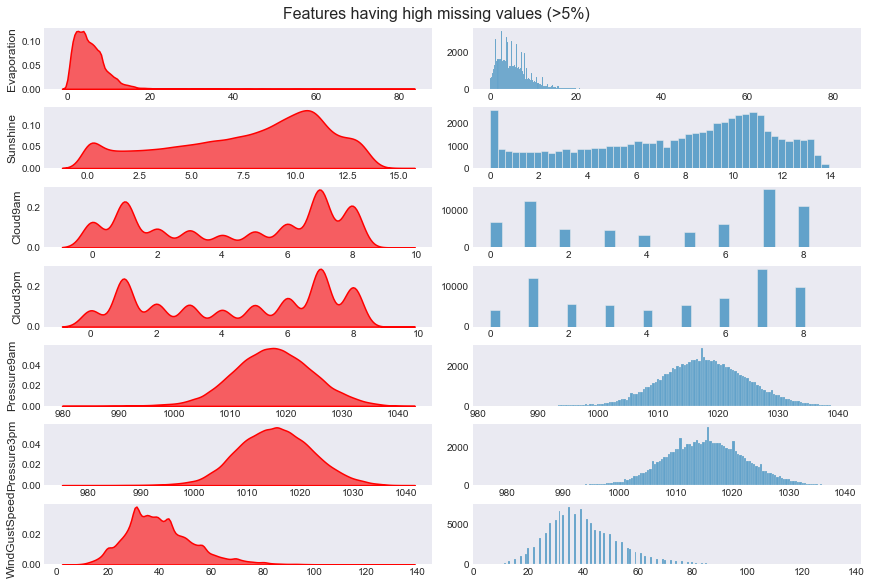

In [138]:
numeric_cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed']

plt.style.use('seaborn-dark')
fig, ax = plt.subplots(7,2, figsize = (12, 8), constrained_layout = True)

for i, num_var in enumerate(numeric_cols): 
    sns.kdeplot(data = X_train, x = num_var, ax = ax[i][0],
                fill = True, alpha = 0.6, linewidth = 1.5, color='r')
    ax[i][0].set_ylabel(num_var)
    ax[i][0].set_xlabel(None)
    
    sns.histplot(data = X_train, x = num_var, ax = ax[i][1])
    ax[i][1].set_ylabel(None)
    ax[i][1].set_xlabel(None)
    
fig.suptitle('Features having high missing values (>5%)', size = 16);


From the plots above we can see that only Evaporation doesn't have distributed data.  
Which means that we will impute them with their **Median** values and only Evaporation with it's **Mean** value.

In [139]:
for df in [X_train, X_test]:
    for col in numeric_cols:
        if col != 'Evaporation':
            df[col].fillna(X_train[col].median(), inplace = True)
        else:
            df['Evaporation'].fillna(X_train['Evaporation'].mean(), inplace = True)
print("DONE!")

DONE!


Now we will remove the rows of the columns with less than 5% NaN values.

In [140]:
X_train.dropna(inplace = True)
X_test.dropna(inplace = True)
print("DONE!")

DONE!


Final check to see that we filled all the empty blocks.

In [141]:
both = pd.concat([X_train , X_test])
missing_vals = pd.DataFrame(both.isnull().sum(), columns = ['Amount of missing values:'])
missing_vals['Percentage of missing values:']= (missing_vals / len(both)).round(4) * 100
missing_vals

,Amount of missing values:,Percentage of missing values:
Date,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0


Now we will check to see if some of the categories are correlated with some others.  
we will check only linear correlations to see if we can find some patterns. 

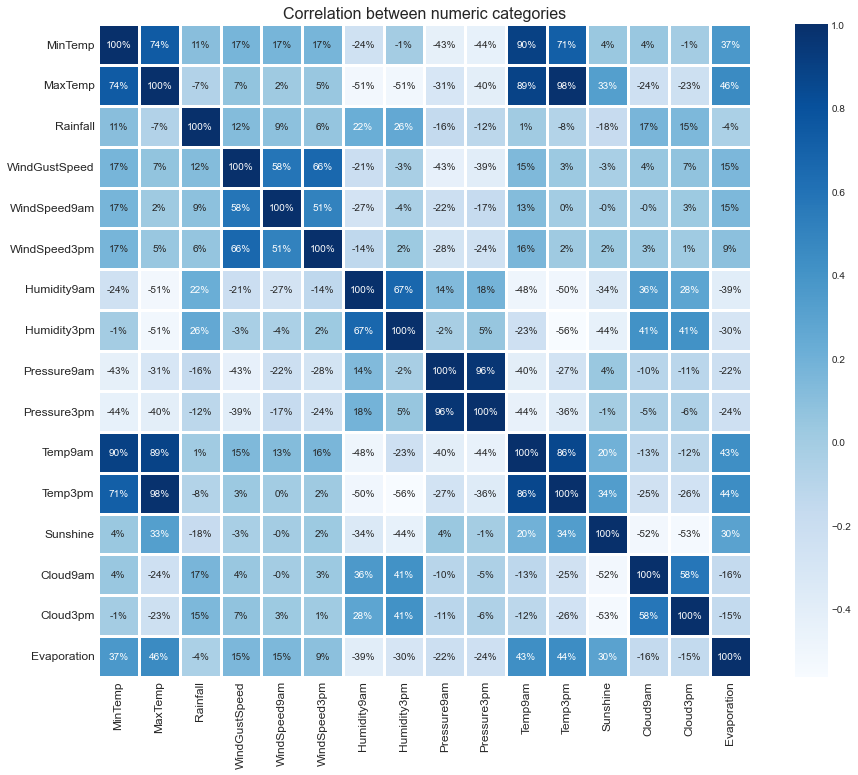

In [142]:
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
              'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']
fig=plt.figure(figsize=(16,12))
axis=sns.heatmap(X_train[numeric_cols].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between numeric categories', fontsize=16);
axis.set_xticklabels(numeric_cols, fontsize=12)
axis.set_yticklabels(numeric_cols, fontsize=12, rotation=0);

**We found some strong correlation between:**  
* Temp3pm and MaxTemp
* Pressure3pm and Pressure9am
* Temp9am and MinTemp
* Temp9am and MaxTemp
* Temp3pm and Temp9am


We will remove one from each pair, to avoid multicollinearity.  
But first we will look at theirs scatter.

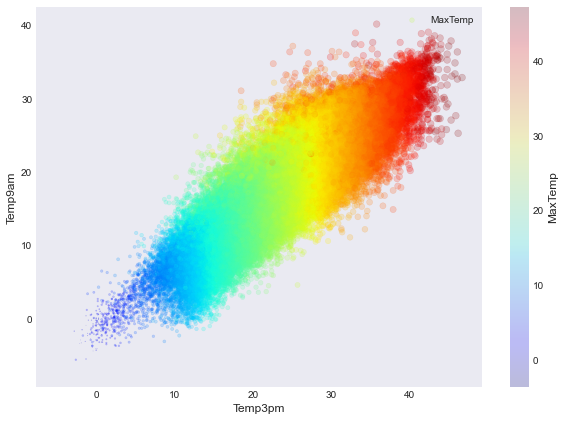

In [143]:
X_train.plot(kind="scatter", x="Temp3pm", y="Temp9am", alpha=0.2,
             s=X_train["MaxTemp"], label="MaxTemp", figsize=(10,7),
             c="MaxTemp", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

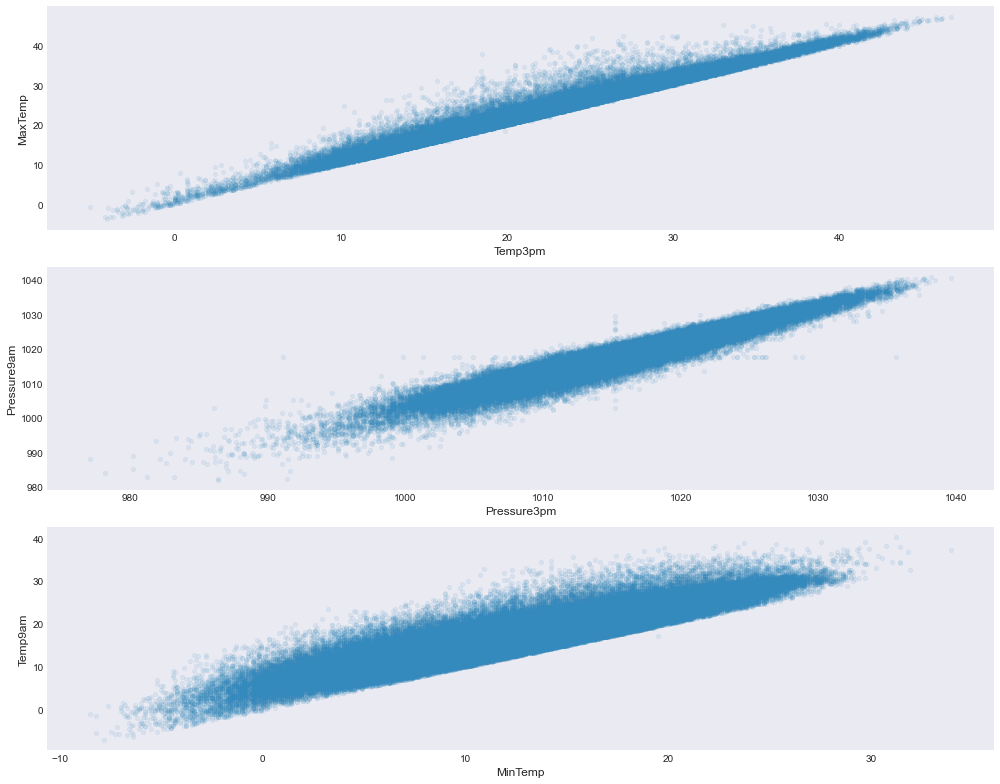

In [144]:
fig, ax = plt.subplots(3, 1, figsize = (14,11), )
((ax1, ax2, ax3)) = ax

X_train.plot(ax=ax1, kind='scatter', x='Temp3pm', y='MaxTemp', alpha = 0.1)
X_train.plot(ax=ax2, kind='scatter', x='Pressure3pm', y='Pressure9am', alpha = 0.1)
X_train.plot(ax=ax3, kind='scatter', x='MinTemp', y='Temp9am', alpha = 0.1)


plt.tight_layout()
plt.show()

As we saw from the correlation matrix and from the plots above there is a high linear  
correlation, so we will remove 
**Temp3pm, Pressure3pm, Temp9am** .

In [145]:
for combined in [X_train, X_test]:
    combined.drop(['Temp3pm', 'Pressure3pm', 'Temp9am'], axis = 1, inplace = True)
print("DONE!")

DONE!


Now we will drop the columns that we transformed already.

In [146]:
for combined in [X_train, X_test]:
    combined.drop(['Location', 'Date', 'day', 'month'], axis = 1, inplace = True)
print("DONE!")

DONE!


Our model can't do math calculations on non-numeric values, so we will convert "YES" to **1** and "NO" to **0** .

In [147]:
X_train['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
X_test['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)

**Checking for imbalance:**

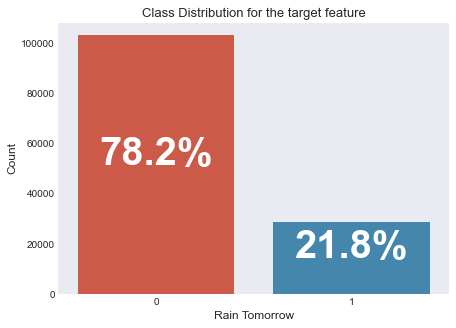

In [148]:
fig = plt.figure(figsize = (7, 5))
axis = sns.countplot(x = 'RainTomorrow', data = weather);
axis.set_title('Class Distribution for the target feature', size = 13);

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(weather)*100, 1)}%", 
            ha = 'center', size = 40, rotation = 0, weight = 'bold' ,color = 'white')
    
axis.set_xlabel('Rain Tomorrow', size = 12)
axis.set_ylabel('Count', size = 12);

We found that only **21.8%** samples from our training set are days that actually had rain on the RainTomorrow column.  
This suggests that we might have a good accuracy in our model but because there are only 21.8% times that our model can predict and say **YES** if our model will keep predict **NO** all the time we will have high accuracy. But that's not true at all.  
*Like the bomb model that we saw in the class*

Now we will transform the remaining non-numeric columns to a numeric values using the get_dummies from Pandas library.

In [149]:
X_train = pd.get_dummies(X_train, columns=['WindDir9am', 'WindDir3pm', 'WindGustDir'])
X_test = pd.get_dummies(X_test, columns=['WindDir9am', 'WindDir3pm', 'WindGustDir'])

Our final step before starting to work on the model is to repair the imbalance we have on the data.

In [150]:
sm = SMOTE(random_state = 37)
temp = y_train
X_train, y_train = sm.fit_resample(X_train, y_train)

print("Before {}".format(Counter(temp)))
print("After {}".format(Counter(y_train)))

Before Counter({0: 87522, 1: 24388})
After Counter({0: 87522, 1: 87522})


### Scaling the data
There are two ways of scalling the data:
* min max Normalization,    y = (x – min) / (max – min)
* Standardization,       y = (x – mean) / standard_deviation

The reason we are doing scaling to our data is that each feature will have the same impact on our model.  
We chose the Min-Max method because there isn't a significant amount of outliers in our data.  


In [151]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train= min_max_scaler.transform(X_train)
X_test= min_max_scaler.transform(X_test)

# Models


### Dummy Classifier

In [152]:
dummyModel = DummyClassifier(strategy="stratified")
dummyModel.fit(X_train, y_train)
predictionsDummy = dummyModel.predict(X_test)

accuracyDummy = metrics.accuracy_score(y_test, predictionsDummy)
accuracyDummy

0.4996202339358955

### Logicstic Regression


In [153]:
modelLogReg = LogisticRegression(max_iter=500)
modelLogReg.fit(X_train, y_train)


max_index = 1 #saving the index of the highest score
max_score = 0 #saving the value of the highest score
# for i in range(2,20):
#     accuracy = cross_val_score(modelLogReg, X_train, y_train, cv = i).mean()
#     if (accuracy > max_score):
#         max_index = i
#         max_score = accuracy
# print('Best index:', maxi, "\ncross_val_score of index", max_index, ':', max_score)

# We already tried and the best index is 11.
accuracy = cross_val_score(modelLogReg, X_train, y_train, cv = 11).mean()
max_index = 11
max_score = accuracy
print('Best index:', max_index, "\ncross_val_score of index", max_index, ':', max_score)

predictionsLogReg = modelLogReg.predict(X_test)
accuracyLogReg = metrics.accuracy_score(y_test, predictionsLogReg)
print("Accuracy (Logistic Regression): ", accuracyLogReg)


Best index: 11 
cross_val_score of index 11 : 0.8925538022758019
Accuracy (Logistic Regression):  0.8535115702060864


### K Nearest Neighbors - KNN

In [154]:
modelKNN = KNeighborsClassifier(weights='distance')
modelKNN.fit(X_train, y_train)

max_index = 1 #saving the index of the highest score
max_score = 0 #saving the value of the highest score
# for i in range(2,20):
#     accuracy = cross_val_score(modelKNN, X_train, y_train, cv = i).mean()
#     if (accuracy > max_score):
#         max_index = i
#         max_score = accuracy
# print('Best index:', maxi, "\ncross_val_score of index", max_index, ':', max_score)

accuracy = cross_val_score(modelKNN, X_train, y_train, cv = 12).mean()
print("Best index: 12\n", accuracy)

predictionsKNN = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, predictionsKNN)
print("Accuracy KNN): ", accuracyKNN)

Best index: 12
 0.8619432828317452
Accuracy KNN):  0.7936604385032153


### Random Forest Classifier

In [155]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

accuracy = cross_val_score(RandomForest, X_train, y_train, cv = 5).mean()

print('RandomForestClassifier cross_val_score =', accuracy)

RandomForestClassifier cross_val_score = 0.8981002302855211


We need to find the **best** fold for cross validation.

In [156]:
maxi = 1 #saving the index of the highest score
max = 0 #saving the value of the highest score
# for i in range(6,15):
#     accuracy = cross_val_score(RandomForest, X_train, y_train, cv = i).mean()
#     if (accuracy > max):
#         maxi = i
#         max = accuracy
# print('Best index:', maxi, "\ncross_val_score of index", maxi, ':', max)

# We already tried and the best index is 14.
accuracy = cross_val_score(RandomForest, X_train, y_train, cv = 14).mean()
print('Best index:', 14, "\ncross_val_score of index", 14, ':', accuracy)

Best index: 14 
cross_val_score of index 14 : 0.9113095568881402


**Fine tuning the random forest model using random GridSearch.**  
First we will choose the parameters for the GridSearch.

In [84]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


**Now we will use the random grid to search for best hyperparameters.**   
Random search of parameters, using 14 fold cross validation because we got the best score at our   
former search, 
search across 100 different combinations, and use all available cores

In [59]:
# First create the base model to tune
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 14, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 14 folds for each of 100 candidates, totalling 1400 fits


RandomizedSearchCV(cv=14, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

**By using "rf_random.best_params_" we get the best hyperparameters that we found:**  

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

**Now we will choose the best hyperparameters that we found and create another Random Forest Classifier.**

In [157]:
# best_random = rf_random.best_estimator_
best_random = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', bootstrap = False)
best_random.fit(X_train, y_train)

print('Best RandomForestClassifier cross_val_score =', cross_val_score(best_random, X_train, y_train, cv = 14).mean())



Best RandomForestClassifier cross_val_score = 0.9158055923629786


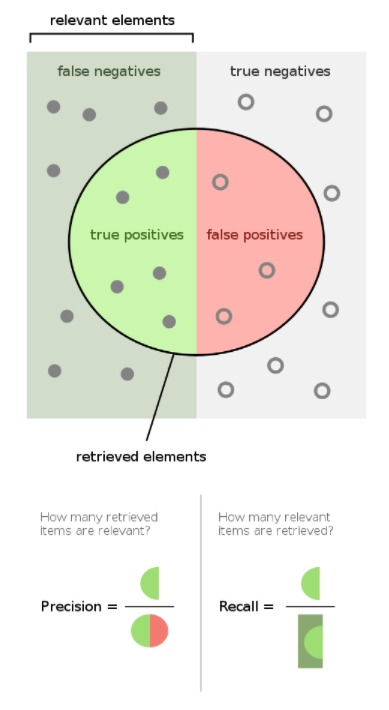

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 


**F1 Score = 2*(Recall * Precision) / (Recall + Precision)**

In [105]:
predictionsRF = best_random.predict(X_test)
accuracyRF = metrics.accuracy_score(y_test, predictionsRF)
print("Accuracy (Random Forest): ", accuracyRF)

conf = confusion_matrix(y_test, predictionsRF)
print("F1 score for Random Forest is :", f1_score(y_test, predictionsRF,) * 100, "%")

Accuracy (Random Forest):  0.8313332320623829
F1 score for Random Forest is : 51.99596483643176 %


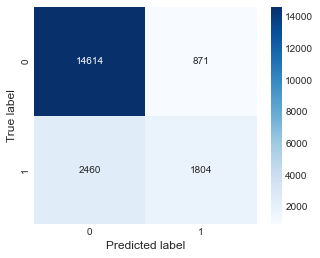

In [158]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsRF), cmap = "Blues", annot=True, fmt = '.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Classification Report:**

In [159]:
print(classification_report(y_test, predictionsRF))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15485
           1       0.67      0.42      0.52      4264

    accuracy                           0.83     19749
   macro avg       0.77      0.68      0.71     19749
weighted avg       0.82      0.83      0.82     19749



# Final score for each Model

In [160]:
print('Logistic Regression  score is: ', modelLogReg.score(X_test, y_test),'.\n')

print('KNN score is: ', modelKNN.score(X_test, y_test),'.\n')

print('RandomForestClassifier score is: ', RandomForest.score(X_test, y_test),'.\n')

print('Best RandomForestClassifier score is: {}.'.format(best_random.score(X_test, y_test)))

Logistic Regression  score is:  0.8535115702060864 .

KNN score is:  0.7936604385032153 .

RandomForestClassifier score is:  0.8628284976454504 .

Best RandomForestClassifier score is: 0.8661198035343561.


## Conclusion:
* Most of our work was on the data itself, we tried as best to do high resarch and understanding the data in order to gain knowledge of the best way to predict whether it will be rain tomorrow.
* We used 3 models and find that the best score we got was with the Random Forest Classifier.
* After Fine tuning with GridSearchCV we got the best result with the Random Forest Classifier with the accuracy score of **86.642%** and F1 score of **65.353%**


___________
-----------

# Upgrading The last project with the new technics and models we laerned in this semester.

In this part we will try to improve the results we gained from the last project.   
We will do so by using new models we learned, and new technics regarding to the data.   
Also we will consider the runtime of each model because it's something that we should encounter when we are doing a Data Science project.  

In [40]:
warnings.filterwarnings('ignore')

In [48]:
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import time
import joblib

First we will go back to the dataset and try to gain new insights.   
Let's recall and observe at the Date column and then we'll pass to the Location column

The **Date** column datatype is Object so we will transform it to date type for easier handling.

In [59]:
weather['Date'] = pd.to_datetime(weather['Date'])

The **Date** column type is not numeric and we want to convert it to a numeric value.  
We will create 3 more columns:
* day - number between 1-31
* month - numebr between 1-12
* year - number of the year

But there is a major problem with that transformation.   
The problem is that our model will gain wrong conclusions regarding to the value of day/month/year.  
We already know that the weather is affected by the date, i.e chance for rain.  
Our model will think that the value 31 is greater then 1, but actually they are just days so our model can go wrong.  
Which is why we will convert the **Date** to **day and month** columns with numeric values, but the values will be cyclic just like the cycle of the month or year.  
This transformation is made with some math calculations and with the help of two famous functions **Sine** and **Cosine**.

credit to: https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

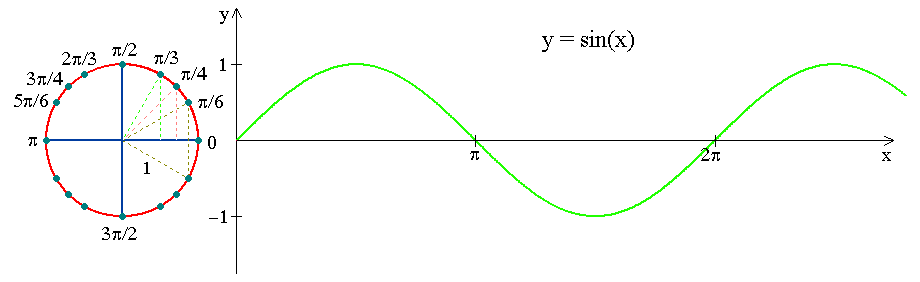

In [60]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

weather['month'] = weather['Date'].dt.month
weather = encode(weather, 'month', 12)

weather['day'] = weather['Date'].dt.day
weather = encode(weather, 'day', 31)

Text(0.5, 1.0, 'Cyclic encoding of Month')

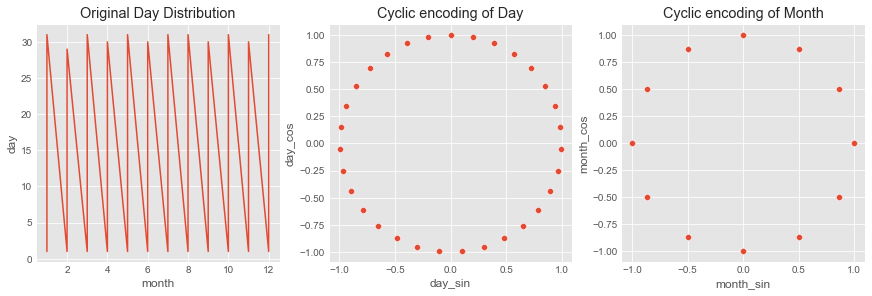

In [61]:
# Let's look at the transformed features

plt.style.use('ggplot')
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (12, 4), constrained_layout = True)

ax1 = sns.lineplot(x = 'month', y = 'day', data = weather, estimator = None, ax=ax1)
ax2 = sns.scatterplot(x = 'day_sin', y = 'day_cos', data = weather, ax = ax2)
ax3 = sns.scatterplot(x = 'month_sin', y = 'month_cos', data = weather, ax = ax3)

ax1.set_title('Original Day Distribution')
ax2.set_title('Cyclic encoding of Day')
ax3.set_title('Cyclic encoding of Month')

The left plot above **Original Day Distribution** represents the original distribution of day and month.  
The middle plot above **Cyclic encoding of Day** represents the cycle of the days with *sin* and *cosine* as x, y.    
The right plot above **Cyclic encoding of Month** represents the cycle of the month with *sin* and *cosine* as x, y.  

Next, we will try to play with the **Location** column, because location is not independent with weather.  
Let's start by trying to gain some knowledge about the location.

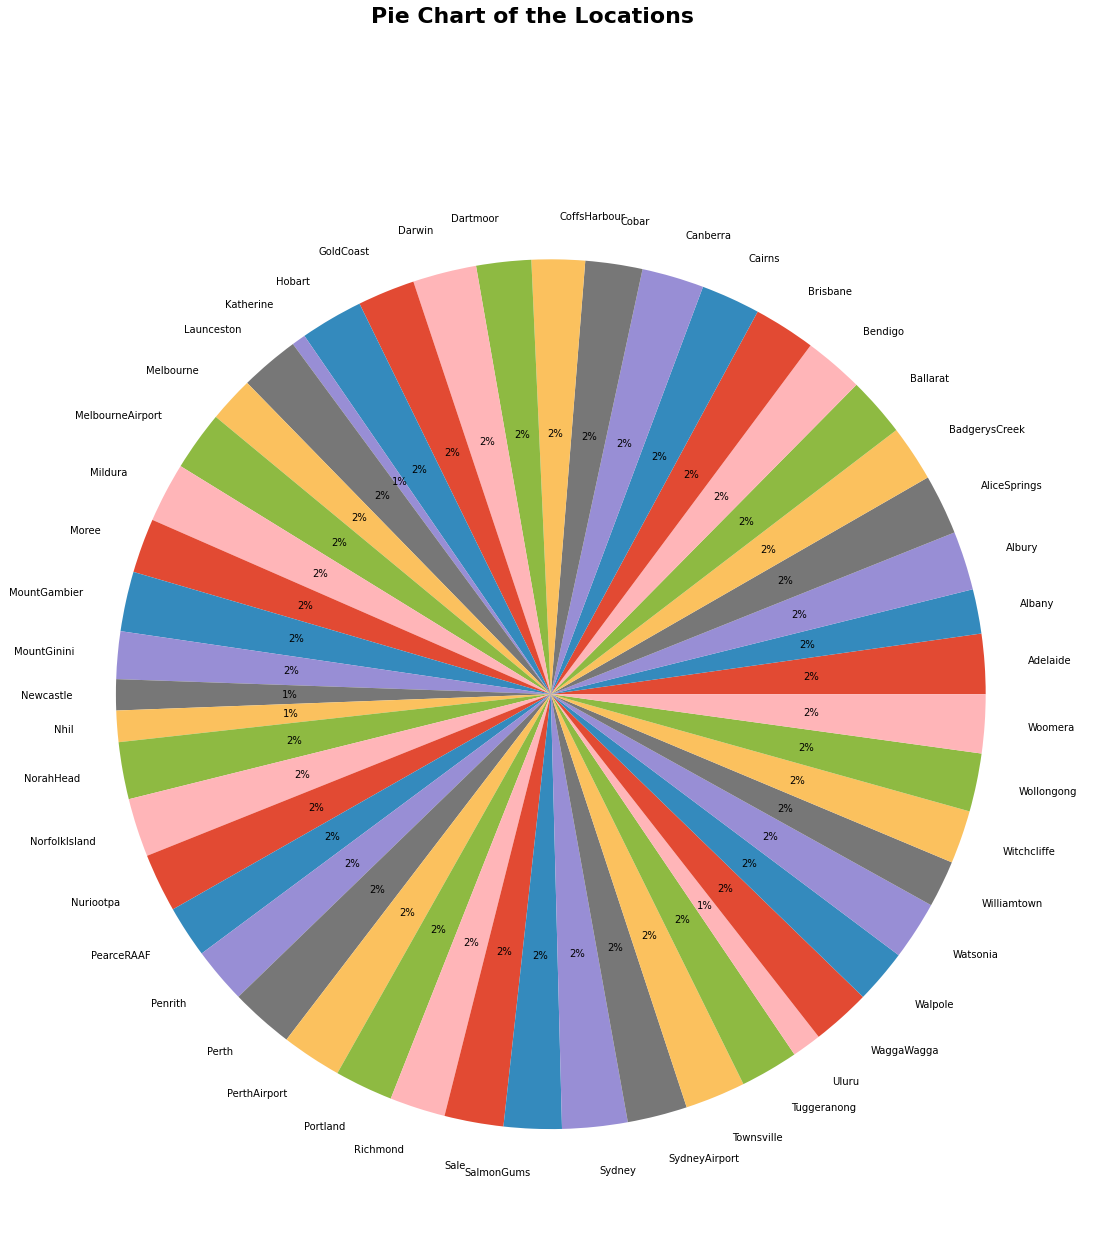

In [11]:
locations = weather.groupby('Location').size()
plt.suptitle('Pie Chart of the Locations', fontsize=22, fontweight='bold')
locations.plot(kind='pie', figsize=(20, 20), autopct='%1.0f%%')
plt.ylabel("")
plt.show()

 <span style="font-size: 19.0pt"><span style="color: blue">In this part we will try to use the power of **loc** and **groupby**</span></span>  
 <span style="font-size: 19.0pt"><span style="color: blue">we discoverd in this semester to gain new insights abour our dataset</span></span>

Now let's examine the samples by counting the amount of times that:
1. "RainToday" happened , was Yes.
2. "RainTomorrow" happened , was Yes.
3. The intersection with "RainToday" and "RainTomorrow"

In [12]:
loc_rain_today = weather.loc[(weather['RainToday'] == 'Yes'), ['RainToday', 'RainTomorrow', 'Location']]
print("The amount of times that RainToday was Yes:", loc_rain_today.shape[0])
loc_rain_tomorrow = weather.loc[(weather['RainTomorrow'] == 'Yes'), ['RainToday', 'RainTomorrow', 'Location']]
print("The amount of times that RainTomorrow was Yes:", loc_rain_tomorrow.shape[0])
loc_both = loc_rain_today.loc[(loc_rain_today['RainTomorrow'] == 'Yes'), ['RainToday', 'RainTomorrow', 'Location']]
print("The amount of times that RainToday and RainTomorrow was Yes:", loc_both.shape[0])

The amount of times that RainToday was Yes: 29867
The amount of times that RainTomorrow was Yes: 29554
The amount of times that RainToday and RainTomorrow was Yes: 13760


In [13]:
loc_rain_today = loc_rain_today.groupby(['Location']).count()['RainToday']
loc_rain_tomorrow = loc_rain_tomorrow.groupby(['Location']).count()['RainTomorrow']
loc_both = loc_both.groupby(['Location']).count()['RainTomorrow']
locations = weather['Location'].unique()
locations_count = weather["Location"].value_counts()

**Let's look at the table below**  
We can see the amount of times that "RainToday" was Yes, and the amount of times that "RainTomorrow" was Yes, and the amount of times that both "RainToday" and "RainTomorrow" was Yes for each of the 49 locations in the dataset.  
*We can also see the percentage of "RainToday"/"RainTomorrow"/both from the amount of samples for each of the locations.* 

In [14]:
amount_of_rain = []
for loc in locations:
    amount_of_rain.append([loc, loc_rain_today[loc], f'{np.around((loc_rain_today[loc]/locations_count[loc]) * 100, 2)}%', loc_rain_tomorrow[loc], f'{np.around((loc_rain_tomorrow[loc]/locations_count[loc]) * 100, 2)}%', loc_both[loc], f'{np.around((loc_both[loc]/locations_count[loc]) * 100, 2)}%'])
    # print(f'{loc}:\n amount of RainToday: {loc_rain_today[loc]} -> {np.around((loc_rain_today[loc]/locations_count[loc]) * 100, 2)}% from total\n amount of RainTomorrow: {loc_rain_tomorrow[loc]} -> {np.around((loc_rain_tomorrow[loc]/locations_count[loc]) * 100, 2)}% from total\n amount of both of them: {loc_both[loc]} -> {np.around((loc_both[loc]/locations_count[loc]) * 100, 2)}% from total\n')
rain_per_loc = pd.DataFrame(amount_of_rain, columns=['Location', 'RainToday', 'Percentage of RainToday', 'RainTomorrow', 'Percentage of RainTomorrow',  'RainToday_and_Tomorrow', 'Percentage of RainToday_and_Tomorrow'])
rain_per_loc

,Location,RainToday,Percentage of RainToday,RainTomorrow,Percentage of RainTomorrow,RainToday_and_Tomorrow,Percentage of RainToday_and_Tomorrow
0,Albury,601,20.43%,600,20.39%,261,8.87%
1,BadgerysCreek,556,19.84%,543,19.38%,233,8.32%
2,Cobar,363,12.72%,367,12.86%,137,4.8%
3,CoffsHarbour,799,30.02%,789,29.64%,419,15.74%
4,Moree,370,13.56%,347,12.72%,119,4.36%
5,Newcastle,372,24.02%,355,22.92%,157,10.14%
6,NorahHead,789,27.65%,787,27.58%,407,14.26%
7,NorfolkIsland,908,30.98%,902,30.77%,393,13.41%
8,Penrith,557,19.91%,553,19.76%,241,8.61%
9,Richmond,530,19.05%,511,18.37%,234,8.41%


From the table above we can see that the amount of times **Rain Today** was Yes and the  
amount of time **Rain Tomorrow** was Yes is quite similar in each of the Towns.  
For example **Brisbane** has 690 times where **Rain Today** was Yes and 688 times where **Rain Tomorrow** was Yes.  
Another thing we learned from the table is that the chances of **Rain Today** and **Rain Tomorrow** to be Yes is low.  
Which means that if for example **Perth** had **Rain Today** there is a small chance that tomorrow will be raining in perth.  
In fact only **10.08%** of the samples in **Perth** has **Rain Today** and **Rain Tomorrow** marked as Yes.

In [ ]:
rain_per_loc.describe()

As we can see, preety much most of the towns/cities have the same amount of values in the data, about 2%.   
Australia has 7 states:   
* Northern Territory - **NT**
* Western Australia - **WA**
* Queensland - **QLD**
* New South Wales - **NSW**
* Victoria - **VIC**
* South Australia - **SA**
* Tasmania - **TAS**

So we'll divide the 49 locations into the 7 states, and we'll create a binary column for each state.   
*Note: Australia capital Canberra has it's own state but due to it's location we will count it as NSW*

**Picture of Austrlia states Map**  

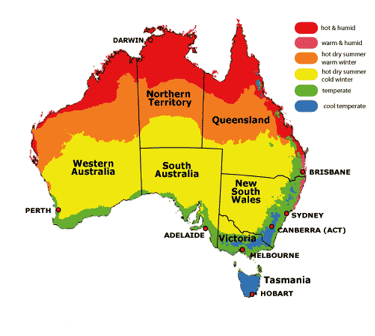

First, we will create a dictionary that holds state to each town/city.

In [15]:
states_dict = {"Canberra" : "NSW", 
"Sydney" : "NSW", 
"Brisbane": "QLD", 
"Perth" : "WA", 
"Darwin" : "NT", 
"Hobart" : "TAS", 
"Adelaide" : "SA", 
"Melbourne" : "VIC", 
"MountGambier" : "SA", 
"Albury" : "VIC", 
"GoldCoast" : "QLD", 
"Ballarat" : "VIC", 
"Bendigo" : "VIC", 
"Wollongong" : "NSW", 
"Launceston" : "TAS", 
"AliceSprings" : "NT", 
"MountGinini" : "NSW", 
"Cairns" : "QLD", 
"Townsville" : "QLD", 
"Albany" : "WA", 
"Newcastle" : "NSW", 
"Tuggeranong" : "NSW", 
"Penrith" : "NSW", 
"Cobar" : "NSW", 
"PerthAirport" : "WA", 
"Mildura" : "VIC", 
"CoffsHarbour" : "NSW", 
"Watsonia" : "VIC", 
"Moree" : "NSW", 
"Portland" : "VIC", 
"NorfolkIsland" : "DELETE", 
"Witchcliffe" : "WA", 
"Williamtown" : "NSW", 
"Sale" : "VIC", 
"Woomera" : "SA", 
"WaggaWagga" : "NSW", 
"SydneyAirport" : "NSW", 
"BadgerysCreek" : "VIC", 
"MelbourneAirport" : "VIC", 
"Richmond" : "VIC", 
"PearceRAAF" : "WA", 
"Nuriootpa" : "SA", 
"Dartmoor" : "VIC", 
"Walpole" : "WA", 
"NorahHead" : "NSW", 
"SalmonGums" : "WA", 
"Katherine" : "NT", 
"Uluru" : "NT", 
"Nhil" : "VIC"
    }

Second, In the **Location** column we will change the city/town to its state.

In [62]:
# town_to_state(weather)
print('DONE!')

DONE!


Now were just confirming that all the values were changed.

In [43]:
print(weather["Location"].value_counts())
print()
print("Sum of all values: ", weather["Location"].value_counts().sum())

NSW    38284
VIC    35847
WA     19252
QLD    11947
SA     11854
NT      8371
TAS     6104
Name: Location, dtype: int64

Sum of all values:  131659


Finally, we can create a single column for each state.  
If the value is **1** then this city/town belongs to that specific state, **0** otherwise.

In [18]:
weather['NT'] = weather['Location'] == 'NT'
weather['VIC'] = weather['Location'] == 'VIC'
weather['WA'] = weather['Location'] == 'WA'
weather['QLD'] = weather['Location'] == 'QLD'
weather['SA'] = weather['Location'] == 'SA'
weather['NSW'] = weather['Location'] == 'NSW'
weather['TAS'] = weather['Location'] == 'TAS'

weather['NT'].replace({False : 0, True : 1},inplace = True)
weather['VIC'].replace({False : 0, True : 1},inplace = True)
weather['WA'].replace({False : 0, True : 1},inplace = True)
weather['QLD'].replace({False : 0, True : 1},inplace = True)
weather['SA'].replace({False : 0, True : 1},inplace = True)
weather['NSW'].replace({False : 0, True : 1},inplace = True)
weather['TAS'].replace({False : 0, True : 1},inplace = True)

weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,day,day_sin,day_cos,NT,VIC,WA,QLD,SA,NSW,TAS
0,2008-12-01,VIC,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1,0.201299,0.979530,0,1,0,0,0,0,0
1,2008-12-02,VIC,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,2,0.394356,0.918958,0,1,0,0,0,0,0
2,2008-12-03,VIC,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,3,0.571268,0.820763,0,1,0,0,0,0,0
3,2008-12-04,VIC,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,4,0.724793,0.688967,0,1,0,0,0,0,0
4,2008-12-05,VIC,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,5,0.848644,0.528964,0,1,0,0,0,0,0


When we created the states dictionary for the Location **NorfolkIsland** we put it's state as **DELETE** .  
The reason we did that is because NorfolkIsland is an Island located almost 2000km from Australia and we think that having                     
this data may harm our model because it's not actually in Australia.  
So we chose to remove all the samples that were taken from NorfolkIsland.

In [19]:
weather.drop(weather[(weather['Location'] == 'DELETE')].index, inplace=True)

After changing each city/town to its state we can see how the samples divides between the seven states of Australia.

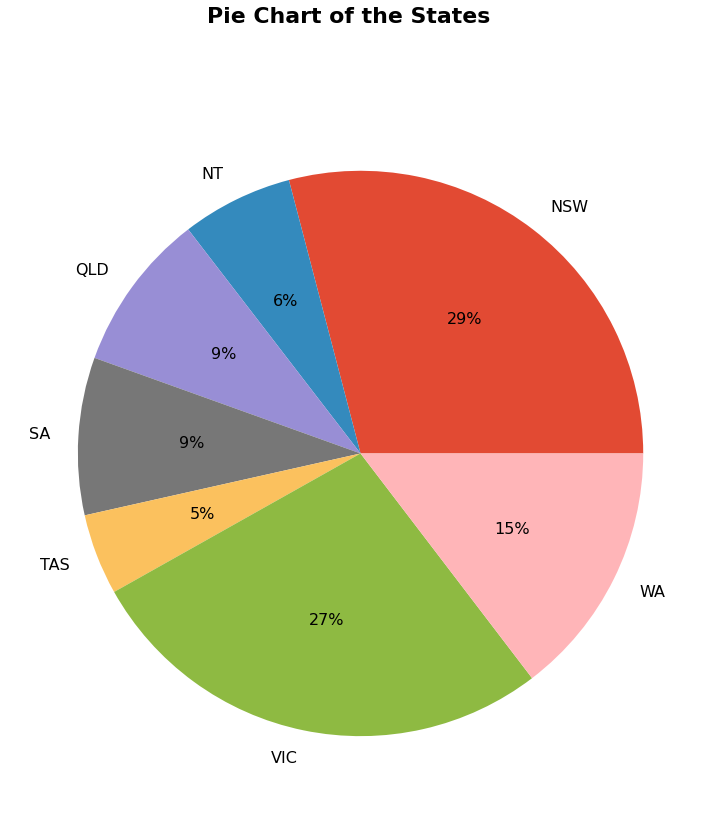

In [20]:
locations = weather.groupby('Location').size()
locations.plot(kind='pie', figsize=(13, 13), autopct='%1.0f%%', fontsize=16)
plt.suptitle('Pie Chart of the States', fontsize=22, fontweight='bold')
plt.ylabel("")
plt.show()

### PCA ###
**Now we will check if we can decrease the number of features we have by performing PCA on the dataset**   
When working with data which has many dimensions, it is often wise to attempt to quicken the classifiers by reducing the number of dimensions used to fit the data. Clearly, the removal of some dimensions will cause the classifier to perform worse than if it were run on the full data, but it can be very beneficial due to it expediting the runtime of the program dramatically. The problem occurs when we try to choose which dimensions to remove from examination, as it could be the feature having a crucial impact on the results of our classifier. This is what the PCA attempts to help us choose.

The PCA algorithm attempts to help us use dimensionality reduction to reduce runtime while slightly reducing the accuracy of the classifiers. Using some linear algebra, the algorithm chooses the number of dimensions (as can be specified using the n_components hyperparameter) which are the most useful for the classifiers. When n_components is set to a value between 0 and 1, the algorithm covers the percentage of variance specified (very useful, as it is making the PCA flexible for different data, or for approximating the accuracy drop of the final classifier).

The PCA should be trained and fitted on the training set, and then the trained PCA should be used to transform both the training and the testing set. Training the PCA on the test set is not right, as it means that we are using both the training and testing to fit the data to a certain shape, while analyzing it as a whole, which is incorrect, as the test set should only be used to test the results.
Despite that, the test set still has to be changed according to what the PCA has fitted on the training set, due to all classifiers requiring the data to be of the same shape in order to work on them.

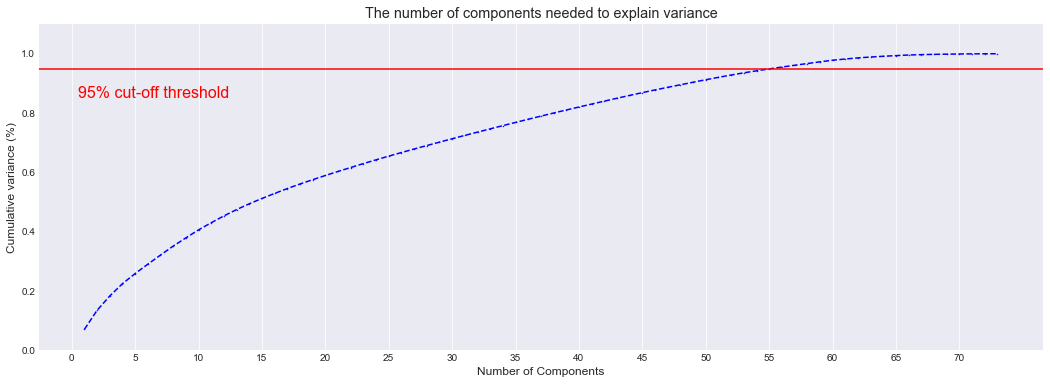

In [161]:
pca = PCA().fit(X_train)

plt.rcParams["figure.figsize"] = (18,6)

fig, ax = plt.subplots()
xi = np.arange(1, 74, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='.', linestyle='--', color='b' ,markersize = 1)

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 75, step=5)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

PCA can decrease the number of features in the data frame, in this case we chose to **55** because from the graph above we can see that only from 55 and above the threshold is less then 5%.
We can decrease the number of features from **73** to **55** and it almost wouldn't affect the data, our threshold was 5%.

In [163]:
pca = PCA(n_components=55)
X_train = pd.DataFrame(pca.fit_transform(X_train.values))
X_test = pd.DataFrame(pca.transform(X_test))
# X_test = pd.DataFrame(pca.transform(X_test))

print(X_train.shape)

(175044, 55)


In [164]:
def results(model):
    y_pred=model.predict(x_test_scaled)
    plt.figure(figsize=(5,4))
    conf =confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    sns.heatmap(conf, cmap = "Blues", annot=True, fmt = '.0f')
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()
    print(classification_report(y_test, y_pred,digits=4))

## New Models

### Gaussian Naive Bayes
We believe that the world distributes in a gaussian way.  
When dealing with continuous data, a typical assumption is that the continuous values associated with each class   
are distributed according to a normal (or Gaussian) distribution.  
This classifier uses the Gaussian distribution to help it classify records.  
By calculating the likelihoods for each feature on whether it is of one class or another, and multiplying  
these likelihoods for all classes, the classifier does its work.   
Note that it takes into account the imbalanced data as the defaul priors for each class (calculated by the classifier).

In [165]:
start_timeGaussianNB = time.time()
gaussian_nb =  GaussianNB()

gaussian_nb.fit(X_train,y_train)
# predictionsGauss = gaussian_nb.score(X_test,y_test)
predictionsGauss = gaussian_nb.predict(X_test)
accuracyGNB = metrics.accuracy_score(y_test, predictionsGauss)
print("Accuracy (Gaussian Naive Bayes): ", accuracyGNB)
timeGNB = time.time() - start_timeGaussianNB
print("Time taken to achive result: %s seconds" % (timeGNB))


Accuracy (Gaussian Naive Bayes):  0.7742164160210644
Time taken to achive result: 0.18917012214660645 seconds


**Ensemble Learning**   
Ensemble methods use multiple learning algorithms to obtain better predictive performance than could  
be obtained from any of the constituent learning algorithms alone.  
Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning  
ensemble consists of only a concrete finite set of alternative models, but typically allows for much more   
flexible structure to exist among those alternatives.  
The strength of Ensemble Learning is its use of "weak learners" (classifiers with an accuracy slightly higher than 50%),   
since the combinations of weak classifiers many times (in the tens, hundreds, or thousands) produce exceptional results.   
Of course, the better the classifier - the more accurate the completed model shall most likely be,   
but accuracy is not always the deciding factor, but rather the runtime of the program: while an ensemble of "strong learners"   
may be more accurate, the program using them will usually run much slower than the one using "weak learners".   
Again, the results usually are quite close in terms of accuracy to make such exceptions.

### AdaBoost
**Adaptive Boost** - This classifier also uses ensemble learning to achieve its purpose. After receiving the results from some base classifier, in our case the Decision Tree Classifier, the model then performs the base classifier over and over (n_estimator times), while each time giving more weight to the misclassified training instances. Then, again using ensemble learning techniques the model returns its final answer according to the many sub-models it created.
The learning rate hyperparameter was left at the default value of 1 (after several tests to determine the best value). The hyperparameter specifies the rate of adaptability of the classifier to the data after each iteration of the estimator.

In [169]:
start_timeAdaBoost = time.time()
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200, algorithm="SAMME.R", learning_rate=0.2)

ada_clf.fit(X_train, y_train)
predictionsAda = ada_clf.predict(X_test)
accuracyAdaBoost = metrics.accuracy_score(y_test, predictionsAda)
print("Accuracy (AdaBoost): ", accuracyAdaBoost)

timeAdaBoost = time.time() - start_timeAdaBoost
print("Time taken to achive result: %s seconds" % (timeAdaBoost))
# results(ada_clf)

Accuracy (AdaBoost):  0.8385234695427617
Time taken to achive result: 1514.8287868499756 seconds


### XGBoost
**Extreme Gradient Boosting -** This classifier uses Ensemble Learning and boosting in a similar yet different way to AdaBoost above.   
Where AdaBoost tweaks the individual instance weights, giving some more or less wight, XGBoost fits a new predictor to the residual  
errors made by the previous predictor.   
It should be noted that the residual errors get smaller with each iteration of XGBoost, making the model very effective.

In [60]:
start_timeXGBoost = time.time()
xg_boost = XGBClassifier()
xg_boost.fit(X_train,y_train)
# xg_boost.score(x_test_scaled, y_test)
predictionsXGBoost = xg_boost.predict(X_test)
accuracyXGBoost = metrics.accuracy_score(y_test, predictionsXGBoost)
print("Accuracy (XGBoost): ", accuracyXGBoost)

timeXGBoost = time.time() - start_timeXGBoost
print("Time taken to achive result: %s seconds" % (timeXGBoost))

Accuracy (XGBoost):  0.8422704947085928
Time taken to achive result: 107.25164222717285 seconds


#### Fine tuning the XGBoost model using random GridSearch.
We use the random grid search to get the best parameters for the model

In [61]:
xgb_params = {
        'max_depth': [3,6,10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'colsample_bytree': [0.3, 0.7],
    }

XGBGridsearch = RandomizedSearchCV(XGBClassifier(n_jobs=-1), xgb_params,scoring='accuracy',cv=3, random_state=0,n_jobs=-1)
XGBGridsearch.fit(X_train, y_train)

XGBGridsearch.best_estimator_
print(XGBGridsearch.best_estimator_)
print(XGBGridsearch.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.829928475126254


Now we will choose the best parameters that we found and create another XGBoost.

In [66]:
start_timeBXGBoost = time.time()
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)
best_xgb.fit(X_train, y_train)
predictionsBestXGBoost = best_xgb.predict(X_test)
accuracyBXGBoost = metrics.accuracy_score(y_test, predictionsBestXGBoost)
print("Accuracy (Best XGBoost): ", accuracyBXGBoost)

timeBXGBoost = time.time() - start_timeBXGBoost
print("Time taken to achive result: %s seconds" % (timeBXGBoost))


# results(best_xgb)

Accuracy (Best XGBoost):  0.8428781204111601
Time taken to achive result: 612.9370994567871 seconds


### Voting
**Voting Classifier -** This classifier takes the results of each model (given in the "estimators" hyperparameter) compares   
the results given by each model for every record of the dataframe, returning the value that most classifiers agree on.   
The voting method was changed to "soft", meaning that from each classifier, the probability of each result will be   
considered, *"how sure the classifier is that its final decision is correct"*, rather than the raw "yes or no" in the case of "hard" voting method.   
The weights of each model in the evaluation are also given, for we know that the last 3 classifiers had much better results than the first two.


**Soft Classifier**

In [170]:
start_timeSVoting = time.time()
voting_clf = VotingClassifier(
estimators=[('KNN', modelKNN), ('rf', best_random), ('XGBoost', best_xgb), ('Logistic', modelLogReg), ('AdaBoost', ada_clf)],
    voting='soft', weights=[1,3,3,2,2], n_jobs=-1)
voting_clf.fit(X_train, y_train)
predictionsVotingSoft = voting_clf.predict(X_test)
accuracySVoting = metrics.accuracy_score(y_test, predictionsVotingSoft)
print("Accuracy (Soft Voting): ", accuracySVoting)

timeSVoting = time.time() - start_timeSVoting
print("Time taken to achive result: %s seconds" % (timeSVoting))
# results(voting_clf)

Accuracy (Soft Voting):  0.8470302293787028
Time taken to achive result: 2299.2494411468506 seconds


**Hard Classifier**

In [171]:
start_timeHVoting = time.time()
voting_clf_Hard = VotingClassifier(
estimators=[('KNN', modelKNN), ('rf', best_random), ('XGBoost', best_xgb), ('Logistic', modelLogReg), ('AdaBoost', ada_clf)],
    voting='soft', weights=[1,3,3,2,2], n_jobs=-1)
voting_clf_Hard.fit(X_train, y_train)
predictionsVotingHard = voting_clf_Hard.predict(X_test)
accuracyHVoting = metrics.accuracy_score(y_test, predictionsVotingHard)
print("Accuracy (Hard Voting): ", accuracyHVoting)

timeHVoting = time.time() - start_timeHVoting
print("Time taken to achive result: %s seconds" % (timeHVoting))
# results(voting_clf)

Accuracy (Hard Voting):  0.8459162489239962
Time taken to achive result: 2132.817752122879 seconds


### Stacking
**Stacking Classifier -** This uses the simple yet elegant idea to take the results given by each predictor for each method.  
Unlike the voting classifier, build a new model to evaluate them and return an answer.  
Which shall be the final result for the instance for this classifier.

In [172]:
start_timeStacking = time.time()
modelStacking = StackingClassifier(estimators= [('KNN', modelKNN),
                                      ('LogReg', modelLogReg),
                                      ('RandForests', best_random),
                                      ('AdaBoost', ada_clf),
                                      ('XGBoost', best_xgb)], 
                         final_estimator=best_xgb)
modelStacking.fit(X_train,y_train)
predictionsStacking = modelStacking.predict(X_test)
accuracyStacking = metrics.accuracy_score(y_test, predictionsStacking)
print("Accuracy (Stacking): ", accuracyStacking)

timeStacking = time.time() - start_timeStacking
print("Time taken to achive result: %s seconds" % (timeStacking))

Accuracy (Stacking):  0.8409539723530305
Time taken to achive result: 12397.478756904602 seconds


### Bagging
**Bagging Classifier -** This classifier combine not many different models, but a single model where the data is   
divided into multiple parts (the number is defined in the n_estimators hyperparameter), and a single model is run  
on all these subsections, resulting in a quite accurate model.   
When the samples taken from the complete dataset can be chosen twice or more for a single predictor,   
the model is called Bagging, if not then it is Pasting. In practice, Pasting is used more when the dataset is large,   
while for smaller datasets, the Bagging Classifier may be a good choice.  
We will Use the XGBoost model as the estimator, as it performed best out of the classifiers we have evaluated up to this point.

In [175]:
start_timeBagging = time.time()
bag_clf = BaggingClassifier(
 best_random, n_estimators=200,
 random_state=42, bootstrap_features=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
predictionsBagging = bag_clf.predict(X_test)
accuracyBagging = metrics.accuracy_score(y_test, predictionsBagging)
print("Accuracy (Bagging): ", accuracyBagging)

timeBagging = time.time() - start_timeBagging
print("Time taken to achive result: %s seconds" % (timeBagging))
# results(bag_clf)
# predictionsBagging

MemoryError: Unable to allocate 1.34 MiB for an array with shape (175044,) and data type float64

### KMeans
The last thing we want to try before comparing the models, is using K-Means Clustering as   
part of our preprocessing of the data.  
In general, the K-Means Clustering method is used for unsupervised learning, dividing the data into multiple clusters, as specified in the "n_clusters" hyperparameter. This is done, in short, by choosing the best starting points (centroids) of the clusters, and then classifying all remaining records to each one's closest centroid.

We can use this method, however, not only in unsupervised learning, but also as a part of the preprocessing and dimentionality reduction of the data. This is done by dividing the data into clusters, and the concatenation of each record's (from the original data) distance from each of the clusters forms a new dataset, on which the classifiers are run to fit and predict the labels of training and testing sets, respectively.

In [176]:
start_timeKMeans = time.time()
pipeline = Pipeline([("kmeans", KMeans(n_clusters=200)), ("Voting Soft", voting_clf)])
pipeline.fit(X_train, y_train)
predictionsKmeans = pipeline.predict(X_test)
accuracykMeans = pipeline.score(X_test, y_test)
print("Accuracy (K-Means): ", accuracykMeans)

timeKMeans = time.time() - start_timeKMeans
print("Time taken to achive result: %s seconds" % (timeKMeans))
# predictionsKmeans

Accuracy (K-Means):  0.8508278900197478
Time taken to achive result: 7659.299383401871 seconds


In [177]:
start_timeKMeans2 = time.time()
pipeline2 = Pipeline([("kmeans", KMeans(n_clusters=200)), ("XGBoost", best_xgb)])
pipeline2.fit(X_train, y_train)
predictionsKmeans2 = pipeline2.predict(X_test)
accuracykMeans2 = pipeline2.score(X_test, y_test)
print("Accuracy (K-Means): ", accuracykMeans2)

timeKMeans2 = time.time() - start_timeKMeans2
print("Time taken to achive result: %s seconds" % (timeKMeans2))
# predictionsKmeans2

Accuracy (K-Means):  0.8506253481188921
Time taken to achive result: 2031.4443998336792 seconds


In [178]:
start_timeKMeans3 = time.time()
pipeline3 = Pipeline([("kmeans", KMeans(n_clusters=200)), ("Random Forest", best_random)])
pipeline3.fit(X_train, y_train)
predictionsKmeans3 = pipeline3.predict(X_test)
accuracykMeans3 = pipeline3.score(X_test, y_test)
print("Accuracy (K-Means): ", accuracykMeans3)

timeKMeans3 = time.time() - start_timeKMeans3
print("Time taken to achive result: %s seconds" % (timeKMeans3))
# predictionsKmeans2

Accuracy (K-Means):  0.846068155349638
Time taken to achive result: 1193.9842479228973 seconds


## Comparing the models

Let's plot a confusion matrix for each of the models to visualize the accuracy of the models.

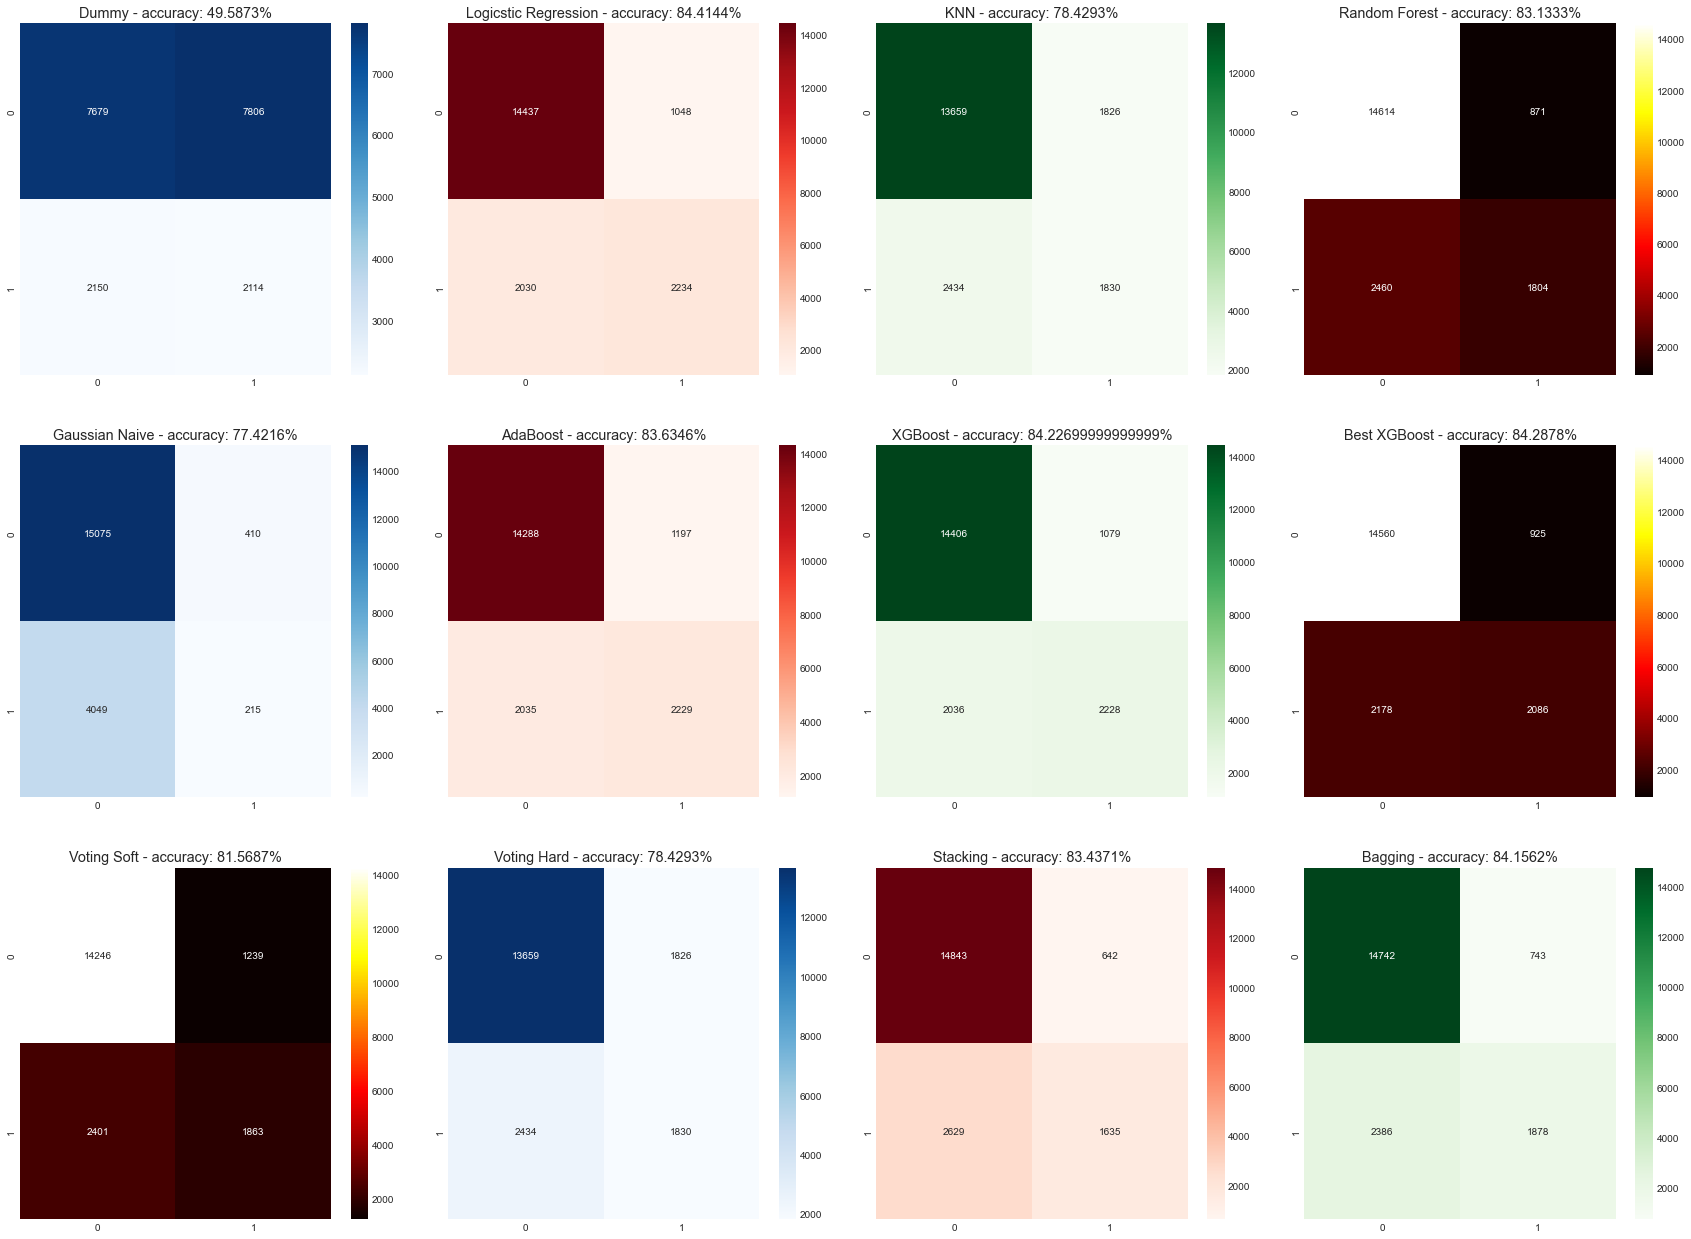

In [114]:
# predictionsLogReg = modelLogReg.predict(X_test)
# predictionsKNN = modelKNN.predict(X_test)
# predictionsRF = best_random.predict(X_test)

fig, ax = plt.subplots(3, 4, figsize = (30,22))
fig.subplots_adjust(wspace=0.01)

sns.heatmap(confusion_matrix(y_test, predictionsDummy), ax=ax[0,0], cmap = "Blues", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsLogReg), ax=ax[0,1], cmap = "Reds", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsKNN), ax=ax[0,2], cmap = "Greens", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsRF), ax=ax[0,3], cmap = "hot", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsGauss), ax=ax[1,0], cmap = "Blues", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsAda), ax=ax[1,1], cmap = "Reds", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsXGBoost), ax=ax[1,2], cmap = "Greens", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsBestXGBoost), ax=ax[1,3], cmap = "hot", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsVotingSoft), ax=ax[2,0], cmap = "hot", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsVotingHard), ax=ax[2,1], cmap = "Blues", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsStacking), ax=ax[2,2], cmap = "Reds", annot=True, fmt = '.0f')
sns.heatmap(confusion_matrix(y_test, predictionsBagging), ax=ax[2,3], cmap = "Greens", annot=True, fmt = '.0f')


ax[0,0].set_title(f'Dummy - accuracy: {round(accuracyDummy, 6) * 100}%')
ax[0,1].set_title(f'Logicstic Regression - accuracy: {round(accuracyLogReg, 6) * 100}%')
ax[0,2].set_title(f'KNN - accuracy: {round(accuracyKNN, 6) * 100}%')
ax[0,3].set_title(f'Random Forest - accuracy: {round(accuracyRF, 6) * 100}%')
ax[1,0].set_title(f'Gaussian Naive - accuracy: {round(accuracyGNB, 6) * 100}%')
ax[1,1].set_title(f'AdaBoost - accuracy: {round(accuracyAdaBoost, 6) * 100}%')
ax[1,2].set_title(f'XGBoost - accuracy: {round(accuracyXGBoost, 6) * 100}%')
ax[1,3].set_title(f'Best XGBoost - accuracy: {round(accuracyBXGBoost, 6) * 100}%')
ax[2,0].set_title(f'Voting Soft - accuracy: {round(accuracySVoting, 6) * 100}%')
ax[2,1].set_title(f'Voting Hard - accuracy: {round(accuracyHVoting, 6) * 100}%')
ax[2,2].set_title(f'Stacking - accuracy: {round(accuracyStacking, 6) * 100}%')
ax[2,3].set_title(f'Bagging - accuracy: {round(accuracyBagging, 6) * 100}%')

fig.subplots_adjust(wspace=0.1)
plt.show()

In [133]:
# plt.figure(figsize=(5,4))
# sns.heatmap(confusion_matrix(y_test, predictionsLogRegy), cmap = "coolwarm", annot=True, fmt = '.0f')

### ROC curve ###
In the following cells, we will plot the ROC curve for the 3 models we have.The ROC curve describes the performance of the model/s according to the confusion matrix. With the changes   in thresholds from the default (0.5 in our case), so does change the confusion matrix, and more specifically the ratio between the right and the left columns of it. As one increases, the other decreases. Likewise, when a bottom cell of a certain column increases, so does the other one in the same column. The later relationship is shown plainly as the ROC curve.
To plot the curve, we first calculate and save the probabilities of every model we want to present. The probabilities are returned as a 2D array, but we only need a single column. The second column ("1") was chosen. we use the metrics.roc_curve() method to return 3 values, the first 2 of which will be used as the x and y axis as their names imply (fpr = false positive rate; trp = true positive rate).
The code that comes after is the plotting of the graphs, the naming of axis and the showing of legend.

In [115]:
probsDummy = dummyModel.predict_proba(X_test)[:, 1]
probsKNN = modelKNN.predict_proba(X_test)[:, 1]
probsLogReg = modelLogReg.predict_proba(X_test)[:, 1]
probsRF = best_random.predict_proba(X_test)[:, 1]
probsGauss = gaussian_nb.predict_proba(X_test)[:, 1]
probsAda = ada_clf.predict_proba(X_test)[:, 1]
probsXGB = xg_boost.predict_proba(X_test)[:, 1]
probsBestXGB = best_xgb.predict_proba(X_test)[:, 1]
probsVoting = voting_clf.predict_proba(X_test)[:, 1]
probsStacking = stack.predict_proba(X_test)[:, 1]
probsBagging = bag_clf.predict_proba(X_test)[:, 1]

AttributeError: predict_proba is not available when voting='hard'

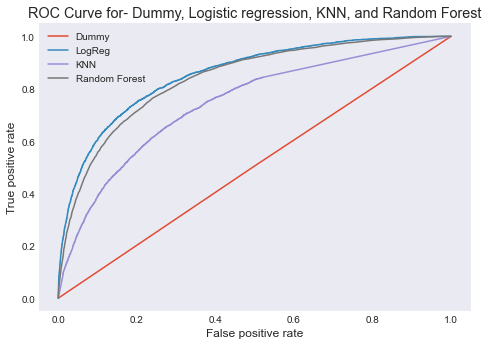

In [127]:
fprDummy, tprDummy, thresholdsDummy = metrics.roc_curve(y_test, probsDummy)
fprLR, tprLR, thresholdsLR = metrics.roc_curve(y_test, probsLogReg)
fprKNN, tprKNN, thresholdsKNN = metrics.roc_curve(y_test, probsKNN)
fprRF, tprRF, thresholdsRF = metrics.roc_curve(y_test, probsRF)
fprGauss, tprGauss, thresholdsGauss = metrics.roc_curve(y_test, probsGauss)
fprAda, tprAda, thresholdsAda = metrics.roc_curve(y_test, probsAda)
fprXGB, tprXGB, thresholdsXGB = metrics.roc_curve(y_test, probsBestXGB)
# fprRF, tprRF, thresholdsRF = metrics.roc_curve(y_test, probsBestXGB)
fprVoting, tprVoting, thresholdsVoting = metrics.roc_curve(y_test, probsVoting)
fprStacking, tprStacking, thresholdsStacking = metrics.roc_curve(y_test, probsStacking)
fprBagging, tprBagging, thresholdsBagging = metrics.roc_curve(y_test, probsBagging)

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(fprDummy, tprDummy, label = "Dummy")
axes.plot(fprLR, tprLR, label = "LogReg")
axes.plot(fprKNN, tprKNN, label = "KNN")
axes.plot(fprRF, tprRF, label = "Random Forest")
axes.plot(fprGauss, tprGauss, label = "Gaussian Naive")
axes.plot(fprAda, tprAda, label = "AdaBoost")
axes.plot(fprXGB, tprXGB, label = "XGBoost")
axes.plot(fprVoting, tprVoting, label = "Voting")
axes.plot(fprStacking, tprStacking, label = "Stacking")
axes.plot(fprBagging, tprBagging, label = "Bagging")

axes.set_xlabel("False positive rate")
axes.set_ylabel("True positive rate")
axes.set_title("ROC Curve for- Dummy, Logistic regression, KNN, Random Forest, Gaussian Naive, AdaBoost, XGBoost, Voting, Stacking, and Bagging")
axes.legend()

For absolution, we seek to calculate the AUC of each model: the area under the ROC curve. Using the built-in method metrics.auc() to calculate. The results are plain. Out of the 3 models shown, the KNN is the best, although the logistic regression is not bad too. The dummy, as predicted, should not be used.

In [128]:
print('AUC of Dummy model:', metrics.auc(fprDummy, tprDummy))
print('AUC of Logistic Regression model:', metrics.auc(fprLR, tprLR))
print('AUC of KNN model:', metrics.auc(fprKNN, tprKNN))
print('AUC of Random Forest model:', metrics.auc(fprRF, tprRF))
print('AUC of Gaussian Naive Bayes model:', metrics.auc(fprGauss, tprGauss))
print('AUC of AdaBoost model:', metrics.auc(fprAda, tprAda))
print('AUC of XGBoost model:', metrics.auc(fprXGB, tprXGB))
print('AUC of Voting model:', metrics.auc(fprVoting, tprVoting))
print('AUC of Stacking model:', metrics.auc(fprStacking, tprStacking))
print('AUC of Bagging model:', metrics.auc(fprBagging, tprBagging))

AUC of Dummy model: 0.5024582359252221
AUC of Logistic Regression model: 0.855215254004208
AUC of KNN model: 0.7447833299307386
AUC of Random Forest model: 0.8385233152460682


Let us show the accuracy scores of the 3 models:

Text(0.5, 1.0, 'Accuracy Scores of the different models')

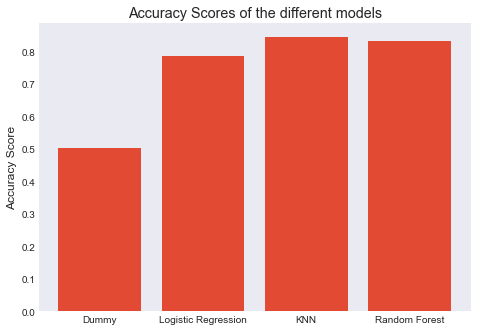

In [132]:
accuracyDummy = metrics.accuracy_score(y_test, predictionsDummy)
accuracyLogReg = metrics.accuracy_score(y_test, predictionsLogReg)
accuracyKNN = metrics.accuracy_score(y_test, predictionsKNN)
accuracyRF = metrics.accuracy_score(y_test, predictionsRF)
accuracyGauss = metrics.accuracy_score(y_test, predictionsGauss)
accuracyAda = metrics.accuracy_score(y_test, predictionsAda)
accuracyXGB = metrics.accuracy_score(y_test, predictionsXGBoost)
accuracyBestXGB = metrics.accuracy_score(y_test, predictionsBXGBoost)
accuracyVotingSoft = metrics.accuracy_score(y_test, predictionsSVoting)
accuracyVotingHard = metrics.accuracy_score(y_test, predictionsHVoting)
accuracyStacking = metrics.accuracy_score(y_test, predictionsStacking)
accuracyBagging = metrics.accuracy_score(y_test, predictionsBagging)
# print('AUC of Dummy model:', metrics.auc(fprDummy, tprDummy))
# print('AUC of Logistic Regression model:', metrics.auc(fprLR, tprLR))
# print('AUC of KNN model:', metrics.auc(fprKNN, tprKNN))
# print('AUC of Random Forest model:', metrics.auc(fprRF, tprRF))
# print('AUC of Gaussian Naive Bayes model:', metrics.auc(fprGauss, tprGauss))
# print('AUC of AdaBoost model:', metrics.auc(fprAda, tprAda))
# print('AUC of XGBoost model:', metrics.auc(fprXGB, tprXGB))
# print('AUC of Voting model:', metrics.auc(fprVoting, tprVoting))
# print('AUC of Stacking model:', metrics.auc(fprStacking, tprStacking))
# print('AUC of Bagging model:', metrics.auc(fprBagging, tprBagging))


fig = plt.figure()
accuracies = [accuracyDummy, accuracyKNN, accuracyLogReg, accuracyRF, accuracyGauss, accuracyAda, accuracyXGB, accuracyBestXGB, accuracyVotingSoft, accuracyVotingHard, accuracyStacking, accuracyBagging]
accuraciesSize = np.arange(len(accuracies))
axes = fig.add_axes([0,0,1,1])
axes.bar(['Dummy', 'Logistic Regression', 'KNN', 'Random Forest', 'Gaussian Naive', 'AdaBoost', 'XGBoost', 'Best XGBoost', 'Voting Soft', 'Voting Hard', 'Stacking', 'Bagging'], accuracies)
axes.set_ylabel("Accuracy Score")
axes.set_title("Accuracy Scores of the different models")

In [ ]:
fig = plt.figure(figsize=(13,6))

accuracies = [accuracyDummy, accuracyKNN, accuracyLogReg, accuracyRF, accuracyGauss, accuracyAda, accuracyXGB, accuracyBestXGB, accuracyVotingSoft, accuracyVotingHard, accuracyStacking, accuracyBagging]
accuraciesSize = np.arange(len(accuracies))
axes = fig.add_axes([0,0,1,1])
axes.bar(['Dummy', 'Logistic Regression', 'KNN', 'Random Forest', 'Gaussian Naive', 'AdaBoost', 'XGBoost', 'Best XGBoost', 'Voting Soft', 'Voting Hard', 'Stacking', 'Bagging'], accuracies)
axes.set_ylabel("Accuracy Score")
axes.set_title("Accuracy Scores of the different models")
plt.rcParams['xtick.labelsize'] = 9
axes.set_ylim([0.75, 0.99])

 <span style="font-size: 30.0pt"><span style="color: green">Conclusion</span></span>  
